# Minería de datos en ciencias de materiales
- Fabián Castro Contreras 
- Sebastian Monteiro 
- Simón Campos Rojas 
- Dylan Riquelme  
- Benjamín Mancilla

## Introducción: Problema y Motivación
La ciencia de materiales es un campo en constante evolución que desempeña un papel fundamental en la creación de tecnologías innovadoras y en la mejora de los materiales existentes para una amplia gama de aplicaciones. En este contexto, la minería de datos emerge como una poderosa herramienta que nos permite desentrañar patrones, descubrir relaciones y extraer información valiosa a partir de vastos conjuntos de datos relacionados con materiales.

Existen poderosas bases de datos que han utilizado algoritmos complejos y supercomputadoras para predecir propiedades de materiales. Una base de datos famosa y ampliamente utilizada debido a la calidad de sus datos es *Materials Project*, la cual presenta información de más de 150,000 materiales. Por lo tanto, encontrar patrones en las propiedades desemboca en un área para la minería de datos.

## Materials Project
*Materials Project* cuenta con una API especialmente diseñada para el acceso a esta base de datos no SQL escrita en MongoDB. Dado la vasta cantidad de datos, se presentará el código utilizado para extraer los datos, pero **NO se sugiere ejecutar este código** ya que tarda bastante en descargar todo.

La API utilizada se llama *mp_api* y puede ser instalada usando *pip*.

La base de datos contiene varias clases, las cuales hay que descargar una por una con las propiedades de interés.

# Exploración de Datos

## 1.- Consiguiendo los datos:

En primera instancia, se obtiene una llave mediante una cuenta creada en la pagina de *Materials Project* para acceder a la base de datos de la misma, luego se descargan los datos y se almacenan en archivos .csv. Después se crea un repositorio en *Github* con todos los datos, los requerimientos para el proyecto (librerías) y los archivos *.ipynb* para el futuro código. 
Para revisar los atributos extraídos para cada clase o dataset, ir a la [tabla anexada](#tabla-de-atributos).

## 2.- Limpieza de datos

A priori no se requiere una limpieza de datos tan exhaustiva para los datos, dado que *Materials Project* tiene los datasets muy completos. Sin embargo, se tuvo que eliminar una columna repetida llamada *"Unnamed: 0"* porque correspondían a los ID´s repetidos y se dejaron todas las columnas solicitadas en el query inicial.

Luego se procede a unir los dataframes mediante un merge en base a la ID de cada objeto, para facilitar la exploración de datos y la interpretación de estos, resultando en un dataframe con 7290 filas y 22 columnas. A continuación se muestran los primeros 5 objetos del dataframe:

[Descripción de los datos luego del merge](#resultado-del-merge-de-los-dataframes)

Notar que cada columna es un atributo físico de los materiales. Al hacer merge, algunos materiales ya no aparecen en la lista, se redujo la cantidad de filas de ~150.000 a ~7.000. 
Esto se produjo porque, para el dataset de materiales dieléctricos, no están los cálculos de los atributos para todos los materiales.

Este análisis se realiza para poder hacer una mirada superficial a las matrices de covarianza, correlación y estadísticas varias. Más adelante es posible que se trabaje con los dataframes por separado debido a la variedad de estructura entre los distintos materiales, o también de alguna forma establecer una estructura universal para poder realizar el merge, pero no perdiendo una cantidad de datos tan grandes.

## 3.- Estadísticas de los datos

A continuación se muestra la descripción de los datos.

[Estadísticas de los datos](#estadisticas-de-los-datos)

Notar que los atributos **e_total, e_ionic, e_electronic y n** tienen valores muy extremos, por esto eso que poseen una desviación estándar tan alta. Además, la diferencia entre los valores mínimos y máximos de estos atributos es muy grande, lo que reafirma la dispersión de los datos. Esto se puede ver en los histogramas de cada atributo:

[Histogramas de cada atributo](#histogramas-de-cada-atributo)

Como se puede observar, la gran mayoría de estos histogramas siguen un patrón de distribución $\chi^2$, no obstante, los histogramas de energía de fermi (efermi) y de energía por átomo (energy_per_atom) parecen acercarse más a una distribución normal.
Hay que notar que para los histogramas de **e_total, e_ionic, e_electronic y n**, se eliminaron los valores extremos para poder apreciar mejor la distribución de los datos.

Se presenta la matriz de correlación de los datos:

[Matriz de correlación](#matriz-de-correlacion-de-los-datos)

Esta matriz desvela distintas características de los datos:
- Entre la energía de reacción en equilibrio y la entalpía de descomposición hay una gran correlación de 0.93.
- Entre la energía de fermi y la densidad hay una correlación interesante de 0.53 y posiblemente útil para la caracterización de los materiales.
- Entre la energía total y n hay correlación de 0.4 y entre e_total y e_electronic hay una correlación de 0.44.
- Entre e_total y e_ionic hay una correlación de 0.93.
- Entre el band_gap y la energía de formación por átomo, la densidad y la energía de fermi existe una correlación inversa de -0.47, -0.39 y -0.53 respectivamente.

Sobre las demás relaciones, hay muy poco más que se pueda rescatar, dada la baja relación entre los atributos.

A continuación se presenta la matriz de covarianza de los datos:

[Matriz de covarianza](#matriz-de-covarianza-de-los-datos)

Desafortunadamente, esta matriz no nos entrega mucha información, ya que no nos deja ver la variabilidad de los datos.


# Inquietudes a responder
- ¿Existen grupos de materiales con características similares? 
- ¿Podemos identificar una característica que influya en lo bueno que puede ser un conductor?


# Propuesta experimental para responder a las preguntas planteadas

## ¿Existen grupos de materiales con características similares?

Al no tener labels, es directo que se va a usar clustering. Se probará con DBSCAN, con K-means y jerárquico.

Para el caso de k-means, se utilizará el método del codo.

DBSCAN no debería ser útil, debido a que aglomera usando las densidades, cosa que , por intuición fisica, no debería influir en el tipo de material, pero de todas maneras se realizará este análisis.


El clustering jerárquico también nos podría entregar un resultado interesante, ya que podrian haber subconjuntos de materiales.

Luego, una pregunta interesante es ver que característica es mas decididora para determinar la pertenencia de un punto a un clustering. Por ejemplo, si ploteamos los puntos con colores que dependen del valor de un atributo, y este color es muy intenso dentro de un cluster en particular, no sería descabellado pensar que esta característica influye bastante en este material y sus características.


## ¿Podemos identificar una característica que influya en lo bueno que puede ser un conductor?

Primero, vamos a filtrar a todos los conductores usando el atributo band_gap  = 0 , esto pues se sabe que todos los conductores tienen este valor. Los semiconductores tienen un bandgap > 0 y los aislantes tienen band gap mucho mas grande. La siguiente imagen ejemplifica un material con band gap = 0 . 

Notar como en el gráfico de la derecha, que muestra la densidad de estados, no hay saltos en la función de color rojo.

[Gráfico de bandgap (1)](#Bandgap-(1))

El siguiente material tiene un band gap distinto de cero, es decir, los electrones necesitan un "pequeño empujón" para pasar de un estado ligado al estado libre de un conductor. Este "pequeño empujón" se puede conseguir con una diferencia de potencial o con el efecto túnel. Aquí la función roja no es continua en todo el espacio, específicamente alrededor de 0.

[Gráfico de bandgap (2)](#Bandgap-(2))


Luego, debido a que no tenemos labels, clasificar no tendría sentido. Por esta razón, se realizará un clustering.

Primero, se probará con k-means . Para inspeccionar la cantidad idónea de clusters, primero se realizará la técnica del codo.

Con la cantidad de clusters obtenida, se realizará k-means. 

También se probará con DBSCAN. La intuición física nos dice que no servirá mucho, pues la densidad de puntos no debería ser un factor de clasificación.

El cluster que nos interesa es el jerárquico, pues queremos identificar que tan buenos son los conductores. Queremos identificar alguna característica que tenga un gradiente que coincida con la forma en la que se agrupan los clusters. Una forma de visualizar esto sería algo así:

[Gráfico de ejemplo de cluster](#ejemplo-cluster)

Notar como los puntos se vuelven más rojos a medida que nos acercamos al centro, una especie de gradiente hacia el centro nos podría indicar que esta característica influye directamente en lo bueno (o malo) que es un conductor. Se utilizará PCA para dimensionar a un gráfico.

Posteriormente se realizará una validación de los métodos de clustering e intentaremos identificar alguna característica o estructura interesante.

# Experimento preliminar

## ¿Existen grupos de materiales con características similares?

Una de las bases en la metodología experimental para este proyecto es la ingeniería de característica. Necesitamos una forma de transformar los datos de composición de elementos, la estructura cristalina y todos los atributos que permiten identificar a un material con parámetros cuantitativos. Esto es de alta complejidad, por suerte existe una librería llamada MatMiner que ya permite recoger estos atributos para cuantificarlos y realizar modelos de Machine Learning.

![](Figuras/featureenginering.png)

Una vez tratados los datos usando ingeniería de características es posible realizar cualquier algoritmo de Machine Learning.

Para este hito, tuvimos un problema de RAM, lo cual nos impedía utilizar la base de datos completa para responder la primera pregunta de investigación. Por ello decidimos responderla solo para los materiales que tenían Silicio (“Si”), lo cual es interesante para la industria de los semiconductores.
Una vez definido este grupo de datos, que cuenta con mas de 6000 materiales, realizamos un algoritmo de clustering K-means utilizando el método del codo para identificar el rango de clusters óptimos.

Con el rango definido entre 3 y 8 clusters, fueron modelados todos y calculados el coeficiente de silueta y el indice de Davies-Bouldin encontrando que el optimo está en 4 clusters para este método.

Como resultado tenemos los siguientes resultados de matriz de similitud y de clusters (ver más en [anexos](#codigo-del-algoritmo-de-clustering-k-means)).

![](Figuras/4_clusters.png)

![](Figuras/matriz_de_similutud.png))


Y los parametros de calidad son los siguientes.

| Coeficiente de silueta          | Indice de Davies-Bouldin                                                                                        |
|--------------------|----------------------------------------------------------------------------------------------------|
| 0.55   | 0.76                 |)


# Anexos

## Tabla de atributos

| Clase              | Atributos                                                                                        |
|--------------------|----------------------------------------------------------------------------------------------------|
| properties_mat (MaterialsDoc)    | material_id, composition, volume, density, density_atomic                                           |
| properties_thermo (ThermoDoc) | material_id, energy_per_atom, formation_energy_per_atom, equilibrium_reaction_energy_per_atom, decomposition_enthalpy |
| properties_electro (ElectroDoc) | material_id, band_gap, efermi, is_metal, is_stable                                                   |
| properties_magnetic (MagneticDoc)| material_id, is_magnetic, exchange_symmetry, num_magnetic_sites                                       |
| properties_dielectric (DielectricDoc) | material_id, e_total, e_ionic, e_electronic, n                                                       |
| properties_oxidate_states (OxidationStateDoc) | material_id, possible_species, possible_valences, average_oxidation_states                        |


Atributos extraídos según la información brindada en la [documentación de Materials Project](https://api.materialsproject.org/docs).

## Resultado del merge de los dataframes

In [ ]:
result.head()

,material_id,e_total,e_ionic,e_electronic,n,band_gap,efermi,is_metal,is_magnetic,exchange_symmetry,...,volume,density,density_atomic,possible_species,possible_valences,average_oxidation_states,energy_per_atom,formation_energy_per_atom,equilibrium_reaction_energy_per_atom,decomposition_enthalpy
0,mp-28944,21.521069,13.942520,7.578549,2.752916,1.5135,1.973873,False,False,186,...,208.023425,5.939485,34.670571,"['Bi3+', 'Cl-', 'Te2-']","[3.0, 3.0, -2.0, -2.0, -1.0, -1.0]","{'Bi': 3.0, 'Te': -2.0, 'Cl': -1.0}",-3.902939,-0.958829,-0.051867,-0.051867
1,mp-28096,3.218928,0.598031,2.620897,1.618918,2.8804,-1.097983,False,False,43,...,465.547991,1.926612,29.096749,"['S+', 'Cl-']","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0,...","{'S': 1.0, 'Cl': -1.0}",-3.466514,-0.474021,-0.075092,-0.075092
2,mp-863678,10.737604,6.585117,4.152487,2.037765,1.6514,2.395559,False,False,146,...,261.201622,5.454615,13.060081,"['O2-', 'K+', 'Sb5+', 'Zn2+']","[1.0, 2.0, 2.0, 2.0, 2.0, 5.0, 5.0, 5.0, -2.0,...","{'K': 1.0, 'Zn': 2.0, 'Sb': 5.0, 'O': -2.0}",-5.816968,-1.922136,-0.022649,-0.022649
3,mp-10461,13.624477,9.998830,3.625647,1.904113,2.9095,2.551343,False,False,167,...,331.052135,5.052121,15.047824,"['O2-', 'Sb5+', 'Na+', 'Sr2+']","[1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.0, ...","{'Na': 1.0, 'Sr': 2.0, 'Sb': 5.0, 'O': -2.0}",-6.392569,-2.738011,-0.088787,-0.086070
4,mp-8756,8.849831,4.815258,4.034573,2.008625,2.5447,0.345471,False,False,129,...,146.040316,2.842588,24.340053,"['Li+', 'Se2-', 'K+']","[1.0, 1.0, 1.0, 1.0, -2.0, -2.0]","{'K': 1.0, 'Li': 1.0, 'Se': -2.0}",-3.542389,-1.370645,-0.034785,-0.034785


## Estadisticas de los datos

In [ ]:
numeric_columns.describe()

,e_total,e_ionic,e_electronic,n,band_gap,efermi,exchange_symmetry,num_magnetic_sites,volume,density,density_atomic,energy_per_atom,formation_energy_per_atom,equilibrium_reaction_energy_per_atom,decomposition_enthalpy
count,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,4647.000000,7290.000000
mean,50.920612,32.398492,18.522120,2.436020,2.336182,1.724809,94.329081,0.560494,289.837992,4.402732,18.878844,-5.782469,-1.733503,-0.125225,-0.075678
std,1655.107848,1487.919679,625.658741,3.549444,1.697134,2.388488,76.760838,1.642730,221.638154,1.862653,8.587621,1.714053,0.982938,0.348267,0.316180
min,1.155248,0.000000,-64.837332,0.000000,0.000000,-7.804680,1.000000,0.000000,11.286588,0.023670,5.643294,-11.047931,-4.491319,-4.427975,-4.427975
25%,7.931442,4.000849,2.940330,1.714739,1.003525,0.215491,15.000000,0.000000,143.530177,3.084127,12.598164,-7.131346,-2.500231,-0.100782,-0.078266
50%,11.662250,6.472804,4.264421,2.065047,1.991500,1.749932,72.000000,0.000000,233.974644,4.129389,15.950793,-5.739387,-1.686184,-0.041113,-0.023512
75%,19.016789,11.364285,6.558800,2.561015,3.418875,3.227443,164.000000,0.000000,367.666530,5.351808,23.677849,-4.422131,-0.925363,-0.016220,0.000381
max,126575.316823,126567.273642,46857.910510,216.466881,12.139100,11.149808,230.000000,24.000000,3998.471538,17.732855,132.548261,-0.219326,5.212425,0.000000,5.212425


## Histogramas de cada atributo

![](Figuras/Histogramas.png)


## Matriz de correlacion de los datos

![](Figuras/MatrizCorrelación.png)


## Matriz de covarianza de los datos

![](Figuras/MatrizCovarianza.png)


## Bandgap (1)

![Material con band gap = 0](band_gap1.png)

## Bandgap (2)

![Material con band gap != 0](bandgap2.png)

## Ejemplo Cluster

![EJEMPLO_CLUSTER](CLUSTER.png)

## Codigo del algoritmo de clustering K-Means

Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.


Retrieving SummaryDoc documents:   0%|          | 0/6385 [00:00<?, ?it/s]

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

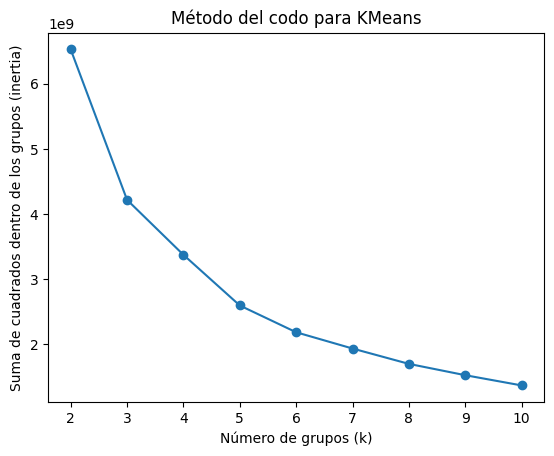

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mp_api.client import MPRester
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval
from matminer.featurizers.base import MultipleFeaturizer, StackedFeaturizer
from matminer.featurizers import composition as cf

# Conectar con la base de datos de materials project usando la API de pymatgen
# La key se obtiene desde la pagina principal de materials proyect
mpr = MPRester("Q4KseBQeiCIFmpyIzcxTaWeQ0DVWzyZf")

# Obtener los datos de materiales que quieres analizar
# Se seleccionan las propiedades: identificador del material (material_id), fórmula reducida (reduced_cell_formula), energía de formación (formation_energy_per_atom) y volumen (volume)
docs = mpr.summary.search(elements=["Si"], band_gap=(0.0, 1.0))

# # Convertir los resultados en un dataframe
df = pd.DataFrame([material.__dict__ for material in docs])

# Aplicar algún método de reducción de dimensionalidad o selección de características para simplificar los datos
# En este ejemplo, se usa la función auto_featurize de matminer para generar automáticamente características a partir de la composición química
# Se usan las siguientes clases de características: ElementProperty, Stoichiometry, ValenceOrbital, IonProperty y ElementFraction
feature_classes = [cf.ElementProperty.from_preset("magpie"), cf.Stoichiometry(), cf.ValenceOrbital(props=["avg"]), cf.IonProperty(), cf.ElementFraction()]
featurizer = MultipleFeaturizer(feature_classes)
X = featurizer.fit_transform(df['composition'])

X_df = pd.DataFrame(X)
X_df = X_df.dropna(axis=1) # Eliminar las columnas con valores nulos

# En este ejemplo, se usa el algoritmo KMeans de sklearn para agrupar los datos en k grupos según su similitud
# Se elige el valor de k usando el método del codo, que consiste en variar el valor de k y observar el cambio en la suma de cuadrados dentro de los grupos (inertia)
ks = range(2, 11) # Probar valores de k entre 2 y 10
inertias = [] # Lista para guardar los valores de inertia para cada k
for k in ks:
    # Crear el modelo de KMeans con k grupos
    model = KMeans(n_clusters=k, random_state=0)
    # Entrenar el modelo con los datos
    model.fit(X_df)
    # Añadir el valor de inertia a la lista
    inertias.append(model.inertia_)

# Graficar los valores de k e inertia
plt.plot(ks, inertias, "-o")
plt.xlabel("Número de grupos (k)")
plt.ylabel("Suma de cuadrados dentro de los grupos (inertia)")
plt.title("Método del codo para KMeans")
plt.show()

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Coeficiente de silueta: 0.54 con 3 clusters
Índice Davies-Bouldin: 0.79 con 3 clusters
Coeficiente de silueta: 0.55 con 4 clusters
Índice Davies-Bouldin: 0.76 con 4 clusters
Coeficiente de silueta: 0.47 con 5 clusters
Índice Davies-Bouldin: 0.81 con 5 clusters
Coeficiente de silueta: 0.48 con 6 clusters
Índice Davies-Bouldin: 0.88 con 6 clusters
Coeficiente de silueta: 0.47 con 7 clusters
Índice Davies-Bouldin: 0.91 con 7 clusters
Coeficiente de silueta: 0.48 con 8 clusters
Índice Davies-Bouldin: 0.86 con 8 clusters


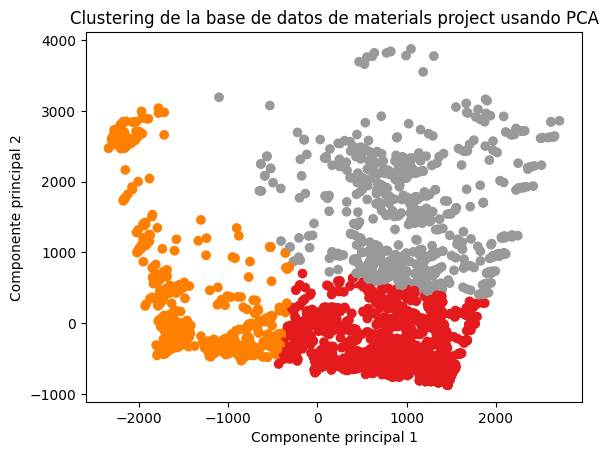

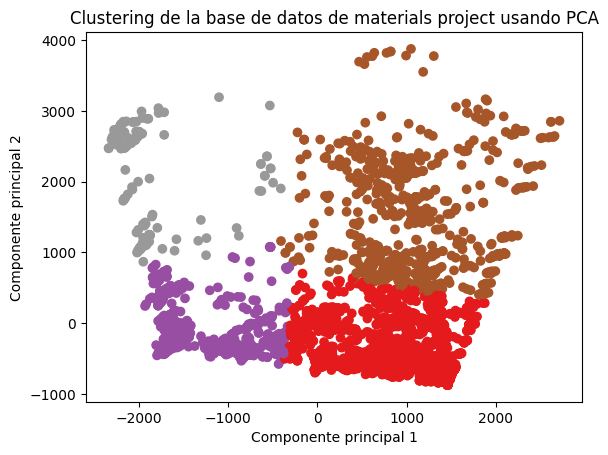

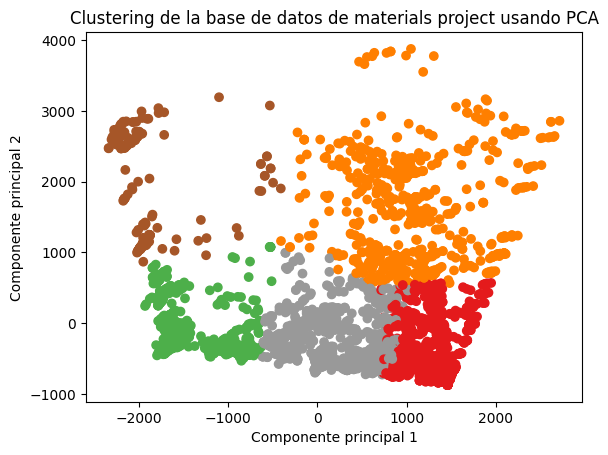

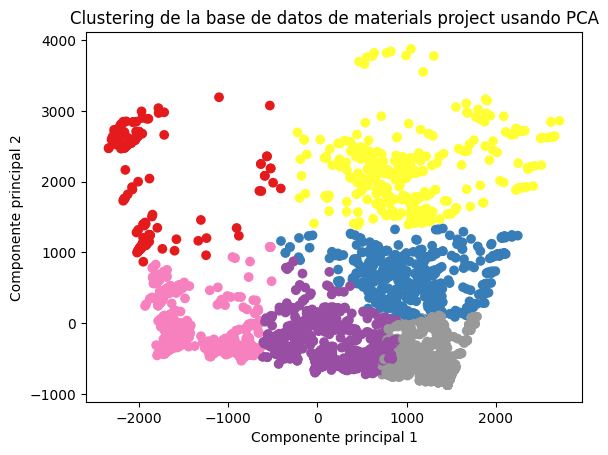

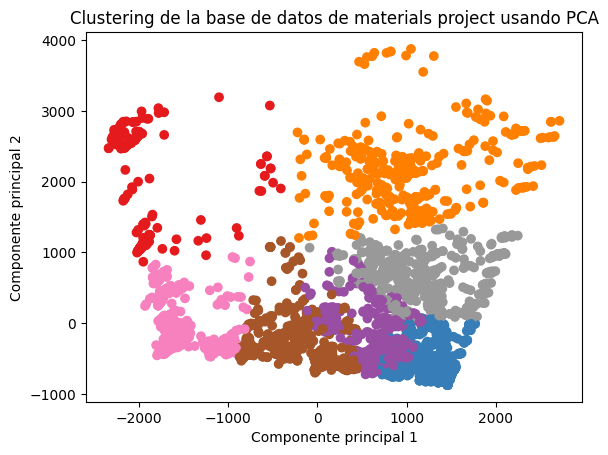

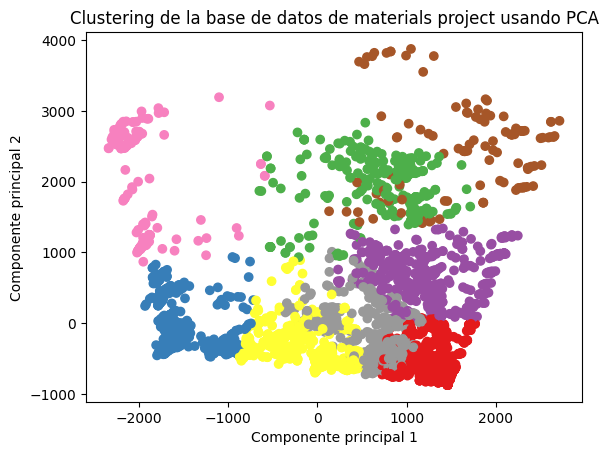

In [3]:
# Según la gráfica, se observa que el valor óptimo de k es 6, ya que a partir de ese punto la curva se suaviza
# Por lo tanto, se crea el modelo de KMeans con k=6 y se obtienen las etiquetas de los grupos asignados a cada material
models = []
labels_all = []
for i in range(3,9):
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(X_df)
    labels = model.labels_
    models.append(model)
    labels_all.append(labels)

# Evaluar el resultado del clustering usando alguna medida de calidad
# En este ejemplo, se usan el coeficiente de silueta y el índice Davies-Bouldin, que miden la cohesión y la separación de los grupos
# El coeficiente de silueta varía entre -1 y 1, siendo 1 el mejor valor posible
# El índice Davies-Bouldin varía entre 0 e infinito, siendo 0 el mejor valor posible
for i in range(0,len(labels_all)):
    silhouette = silhouette_score(X_df, labels_all[i])
    davies_bouldin = davies_bouldin_score(X_df, labels_all[i])
    print(f"Coeficiente de silueta: {silhouette:.2f} con {i+3} clusters")
    print(f"Índice Davies-Bouldin: {davies_bouldin:.2f} con {i+3} clusters")

# Visualizar el resultado del clustering usando alguna técnica de proyección o gráfica
# En este ejemplo, se usa el análisis de componentes principales (PCA) para reducir la dimensionalidad de los datos a dos dimensiones y graficar los puntos con colores según su grupo
for i in range(0,len(labels_all)):
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_df)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_all[i], cmap="Set1")
    plt.xlabel("Componente principal 1")
    plt.ylabel("Componente principal 2")
    plt.title("Clustering de la base de datos de materials project usando PCA")
    plt.show()

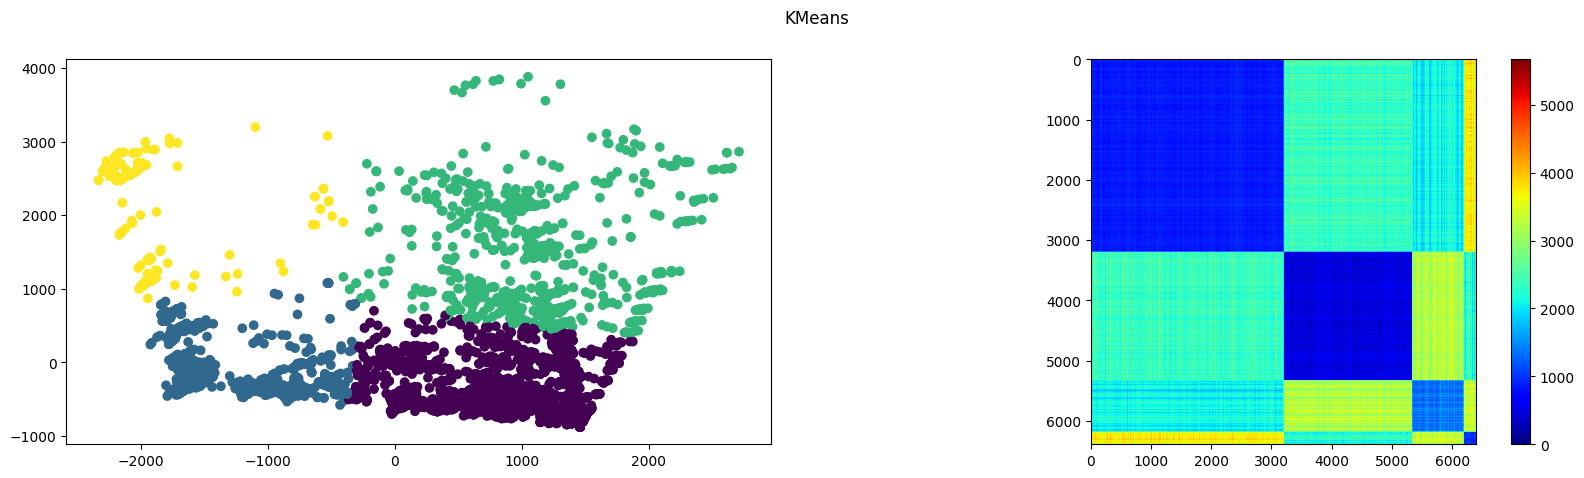

In [4]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np


def sim_matrix(features, labels):
    useful_labels = labels >= 0

    # primero ordenamos los datos en base al cluster que pertencen
    indices = np.argsort(labels[useful_labels])
    sorted_features = features[useful_labels][indices]

    # calculamos las distancias entre todos los puntos
    d = euclidean_distances(sorted_features, sorted_features)
    return d

def plot(data, model, is_model = True):
    if is_model:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

        fig.suptitle(f"{model.__class__.__name__}")

        ax1.scatter(data[:,0], data[:,1], c=model.labels_)

        dist = sim_matrix(data, model.labels_)
        im = ax2.imshow(dist, cmap="jet")
        fig.colorbar(im, ax=ax2)
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

        fig.suptitle('Clustering Jerárquico')

        ax1.scatter(data[:,0], data[:,1], c = model)

        dist = sim_matrix(data, model)
        im = ax2.imshow(dist, cmap="jet")
        fig.colorbar(im, ax=ax2)

plot(X_pca, models[1])

## Repositorio del proyecto
[https://github.com/Fabian-Castro-C/Miner-a-de-datos](https://github.com/Fabian-Castro-C/Miner-a-de-datos)

## Contribución de miembros del equipo

| Miembro            | Tarea |
|--------------------|-------|
| Simón Campos       | Metodología de investigación |
| Fabián Castro      | Implementación de la API y clustering |
| Benjamín Mancilla  | Limpieza de datos y maestría en git |
| Sebastián Monteiro | Formulación de preguntas y procedimiento experimental |
| Dylan Riquelme     | Redacción y organización del informe |
